In [5]:
import os
os.chdir("..")  # Moves one directory up

In [6]:
import pandas as pd 
import numpy as np 
from pathlib import Path
from utils.config import base_path

In [7]:
df = pd.read_csv(base_path/ "gene_expression.csv")
df.head()

,ID_REF,GSM381194,GSM381195,GSM381196,GSM381197,GSM381198,GSM381199,GSM381200,GSM381201,GSM381202,...,GSM381270,GSM381271,GSM381272,GSM381273,GSM381274,GSM381275,GSM381276,GSM381277,GSM381278,GSM381279
0,1007_s_at,2.377898,2.378662,2.382631,2.378621,2.461926,3.290609,2.536218,2.377062,2.456681,...,2.380056,2.615649,2.377875,2.376057,2.702890,2.381181,2.474380,2.389282,2.375837,2.438526
1,1053_at,7.109049,5.156438,5.321988,5.195298,5.980662,6.352822,5.314602,5.440205,5.148019,...,5.693693,5.226776,5.352625,5.136478,6.135809,6.828485,5.215068,5.171455,5.582465,6.478445
2,117_at,9.630326,8.871972,8.348816,9.557484,8.807910,9.133817,8.716893,8.810138,8.196032,...,9.045299,8.207536,8.773177,8.635889,8.638233,8.829302,8.988185,8.082524,8.350547,9.403558
3,121_at,2.331110,2.337406,2.334704,2.643543,2.334267,2.337572,2.342447,2.339926,2.338847,...,2.339649,2.418437,2.349566,2.356812,2.343669,2.344477,2.332166,2.337505,2.329407,2.347640
4,1255_g_at,2.326892,2.325880,2.326533,2.330819,2.327032,2.328993,2.328094,2.329099,2.330408,...,2.331796,2.326758,2.330238,2.327100,2.331183,2.330042,2.324799,2.325841,2.325235,2.329681


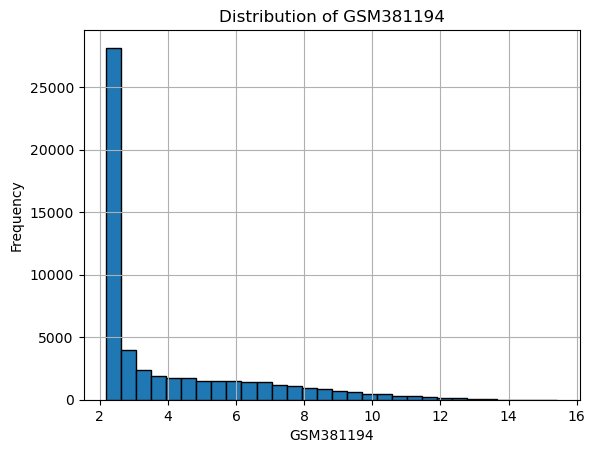

In [8]:
import matplotlib.pyplot as plt

# Plot histogram
df['GSM381278'].hist(bins=30, edgecolor='black')

# Labels and Title
plt.xlabel('GSM381194')
plt.ylabel('Frequency')
plt.title('Distribution of GSM381194')

# Show the plot
plt.show()

In [9]:
# Transpose the DataFrame
df_transposed = df.set_index('ID_REF').T.reset_index()

# Rename columns
df_transposed.rename(columns={'index': 'SampleID'}, inplace=True)
# print(df_transposed)

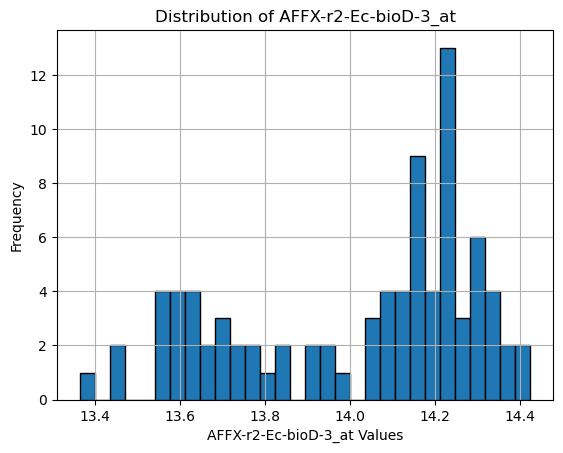

In [10]:
import matplotlib.pyplot as plt

# Plot histogram
df_transposed['AFFX-r2-Ec-bioD-3_at'].hist(bins=30, edgecolor='black')

# Labels and Title
plt.xlabel('AFFX-r2-Ec-bioD-3_at Values')
plt.ylabel('Frequency')
plt.title('Distribution of AFFX-r2-Ec-bioD-3_at')

# Show the plot
plt.show()

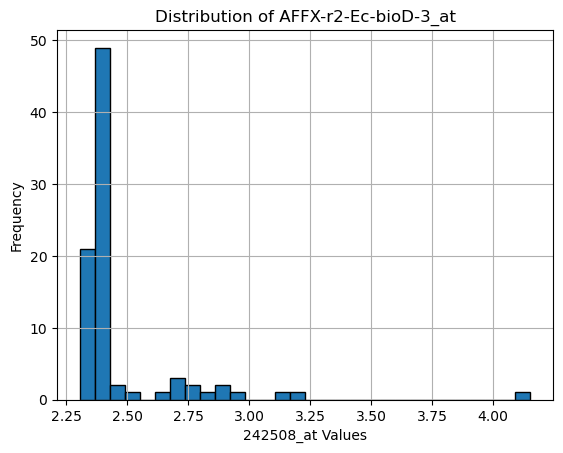

In [11]:
# Plot histogram
df_transposed['242508_at'].hist(bins=30, edgecolor='black')

# Labels and Title
plt.xlabel('242508_at Values')
plt.ylabel('Frequency')
plt.title('Distribution of AFFX-r2-Ec-bioD-3_at')

# Show the plot
plt.show()

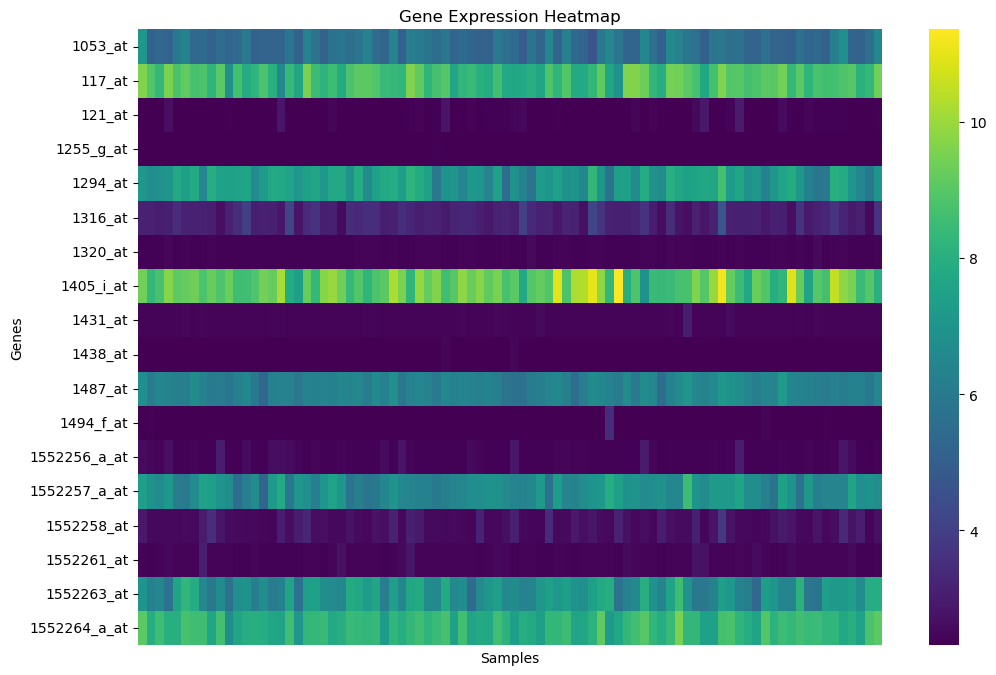

In [12]:
import numpy as np
import seaborn as sns

# Select a random subset of genes (due to large size)
subset_genes = df_transposed.columns[2:20]  # First 18 genes after SampleID
subset_df = df_transposed.set_index("SampleID")[subset_genes]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(subset_df.T, cmap="viridis", xticklabels=False, yticklabels=True)
plt.xlabel("Samples")
plt.ylabel("Genes")
plt.title("Gene Expression Heatmap")
plt.show()


In [13]:
print(df_transposed)

ID_REF   SampleID  1007_s_at   1053_at    117_at    121_at  1255_g_at  \
0       GSM381194   2.377898  7.109049  9.630326  2.331110   2.326892   
1       GSM381195   2.378662  5.156438  8.871972  2.337406   2.325880   
2       GSM381196   2.382631  5.321988  8.348816  2.334704   2.326533   
3       GSM381197   2.378621  5.195298  9.557484  2.643543   2.330819   
4       GSM381198   2.461926  5.980662  8.807910  2.334267   2.327032   
..            ...        ...       ...       ...       ...        ...   
81      GSM381275   2.381181  6.828485  8.829302  2.344477   2.330042   
82      GSM381276   2.474380  5.215068  8.988185  2.332166   2.324799   
83      GSM381277   2.389282  5.171455  8.082524  2.337505   2.325841   
84      GSM381278   2.375837  5.582465  8.350547  2.329407   2.325235   
85      GSM381279   2.438526  6.478445  9.403558  2.347640   2.329681   

ID_REF   1294_at   1316_at   1320_at  1405_i_at  ...  AFFX-r2-Ec-bioD-3_at  \
0       7.145603  3.134364  2.374527   9.3947

In [14]:
# Load your data (assuming you have it in a DataFrame)
features = df_transposed.iloc[:, 2:]  # Exclude non-numeric columns (like SampleID)

# Compute Q1, Q3, and IQR for each feature
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count number of outliers per feature
outlier_counts = ((features < lower_bound) | (features > upper_bound)).sum()

# Sort features by number of outliers
outlier_features = outlier_counts[outlier_counts > 0].sort_values(ascending=False)
outlier_features

ID_REF
242508_at      41
203908_at      40
212801_at      40
244140_at      40
1554105_at     40
               ..
218466_at       1
203493_s_at     1
233903_s_at     1
218465_at       1
1053_at         1
Length: 45565, dtype: int64

In [15]:
# Find the feature with the largest value in the outlier features DataFrame
max_value = features.max().max()  # Get the absolute maximum value
feature_with_max_value = features.max().idxmax()  # Get the feature (column) with max value

# Display results
max_value, feature_with_max_value


(15.55954469, 'AFFX-r2-P1-cre-3_at')

In [16]:
# Find the feature with the largest value in the outlier features DataFrame
min_value = features.min().min()  # Get the absolute maximum value
feature_with_min_value = features.min().idxmin()  # Get the feature (column) with max value

# Display results
min_value, feature_with_min_value

(2.180641921, '1556748_x_at')

In [17]:
total_nan_count = features.isna().sum().sum()
total_nan_count

0

c:\Users\user\anaconda3\envs\test\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


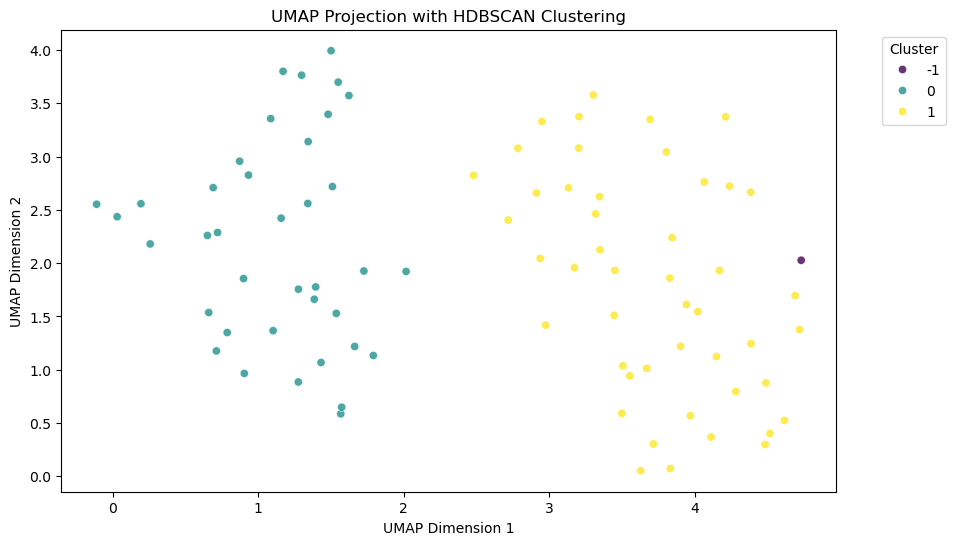

In [18]:
import pandas as pd
import numpy as np
import umap
import hdbscan
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Extracting sample IDs
sample_ids = df_transposed.iloc[:, 0]

# Selecting numeric features
features = df_transposed.iloc[:, 2:].astype(float)

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply UMAP for dimensionality reduction (2D)
umap_reducer = umap.UMAP(n_components=2, random_state=42)
embedding_2d = umap_reducer.fit_transform(features_scaled)

# Apply HDBSCAN for clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5)
labels = clusterer.fit_predict(embedding_2d)

# Convert labels to DataFrame
df_umap = pd.DataFrame(embedding_2d, columns=["UMAP1", "UMAP2"])
df_umap["Cluster"] = labels
df_umap["SampleID"] = sample_ids

# Visualize the UMAP clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_umap["UMAP1"], y=df_umap["UMAP2"], hue=df_umap["Cluster"], palette="viridis", alpha=0.8
)
plt.title("UMAP Projection with HDBSCAN Clustering")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()



In [19]:
merged_df['Response status']	

NameError: name 'merged_df' is not defined

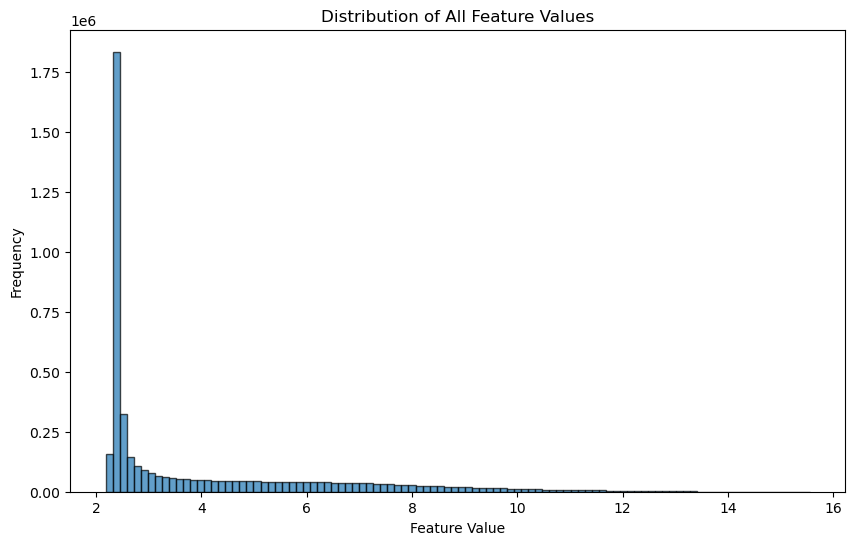

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten all values into a single array
all_values = features.values.flatten()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(all_values, bins=100, edgecolor='black', alpha=0.7)
plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.title("Distribution of All Feature Values")
# plt.yscale("log")  # Log scale to handle large value differences

# Show plot
plt.show()


In [ ]:
df.ID_REF.nunique()

54675

In [24]:
meta_data = pd.read_csv(base_path/ "meta_data.csv")
meta_data.head()

,SampleID,Tissue,disease state,protocol,disease activity score (das28),Response status,Gender
0,GSM381194,whole blood,rheumatoid arthritis,anti_TNF therapy,4.51,Responder,Male
1,GSM381195,whole blood,rheumatoid arthritis,anti_TNF therapy,6.04,Non_responder,Female
2,GSM381196,whole blood,rheumatoid arthritis,anti_TNF therapy,5.92,Non_responder,Male
3,GSM381197,whole blood,rheumatoid arthritis,anti_TNF therapy,4.48,NaN,Female
4,GSM381198,whole blood,rheumatoid arthritis,anti_TNF therapy,6.00,Non_responder,Female


In [ ]:
meta_data['Response status'].value_counts(dropna=False)

Response status
NaN              40
Responder        24
Non_responder    22
Name: count, dtype: int64

In [ ]:
meta_data['disease activity score (das28)'].isna().sum()

6

In [ ]:
meta_data["SampleID"]

0     GSM381194
1     GSM381195
2     GSM381196
3     GSM381197
4     GSM381198
        ...    
81    GSM381275
82    GSM381276
83    GSM381277
84    GSM381278
85    GSM381279
Name: SampleID, Length: 86, dtype: object

In [ ]:
df_transposed["SampleID"]

0     GSM381194
1     GSM381195
2     GSM381196
3     GSM381197
4     GSM381198
        ...    
81    GSM381275
82    GSM381276
83    GSM381277
84    GSM381278
85    GSM381279
Name: SampleID, Length: 86, dtype: object

In [ ]:
merged_df = pd.merge(df_transposed, meta_data, on='SampleID', how='inner')  # Change 'how' as needed
merged_df

,SampleID,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,Tissue,disease state,protocol,disease activity score (das28),Response status,Gender
0,GSM381194,2.377898,7.109049,9.630326,2.331110,2.326892,7.145603,3.134364,2.374527,9.394731,...,2.389734,2.391520,2.372542,2.383567,whole blood,rheumatoid arthritis,anti_TNF therapy,4.51,Responder,Male
1,GSM381195,2.378662,5.156438,8.871972,2.337406,2.325880,6.724430,3.132534,2.371931,8.343010,...,2.389150,2.388430,2.371702,2.383306,whole blood,rheumatoid arthritis,anti_TNF therapy,6.04,Non_responder,Female
2,GSM381196,2.382631,5.321988,8.348816,2.334704,2.326533,6.856559,2.996339,2.373904,8.742820,...,2.389496,2.390634,2.373524,2.384077,whole blood,rheumatoid arthritis,anti_TNF therapy,5.92,Non_responder,Male
3,GSM381197,2.378621,5.195298,9.557484,2.643543,2.330819,7.046044,3.092153,2.464753,9.732182,...,2.395262,2.399168,2.382912,2.396485,whole blood,rheumatoid arthritis,anti_TNF therapy,4.48,NaN,Female
4,GSM381198,2.461926,5.980662,8.807910,2.334267,2.327032,7.758407,3.444969,2.375944,9.125310,...,2.389583,2.392193,2.373700,2.384135,whole blood,rheumatoid arthritis,anti_TNF therapy,6.00,Non_responder,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,GSM381275,2.381181,6.828485,8.829302,2.344477,2.330042,7.838044,3.205565,2.427117,9.818627,...,2.396832,2.409559,2.383257,2.396887,whole blood,rheumatoid arthritis,anti_TNF therapy,6.32,Responder,Female
82,GSM381276,2.474380,5.215068,8.988185,2.332166,2.324799,7.064042,2.937625,2.368752,9.514040,...,2.379666,2.386082,2.373037,2.380099,whole blood,rheumatoid arthritis,anti_TNF therapy,5.68,NaN,Male
83,GSM381277,2.389282,5.171455,8.082524,2.337505,2.325841,6.457176,3.088633,2.370828,8.449640,...,2.388452,2.389719,2.372873,2.381379,whole blood,rheumatoid arthritis,anti_TNF therapy,5.15,NaN,Male
84,GSM381278,2.375837,5.582465,8.350547,2.329407,2.325235,5.976685,2.547915,2.368775,8.950439,...,2.388015,2.385543,2.369253,2.376973,whole blood,rheumatoid arthritis,anti_TNF therapy,6.04,NaN,Female


In [ ]:
#https://datascience.stackexchange.com/questions/12455/feature-selection-for-gene-expression-dataset

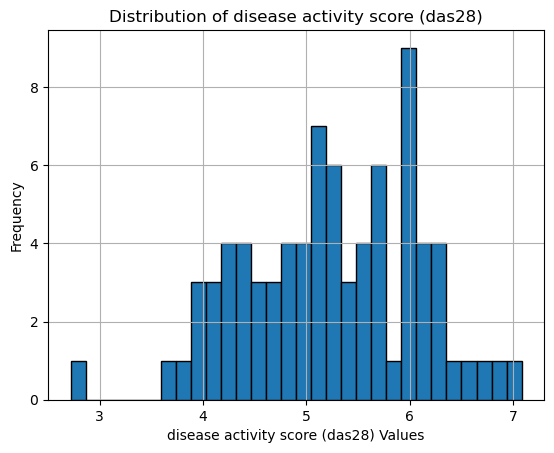

In [ ]:
# Plot histogram
meta_data['disease activity score (das28)'].hist(bins=30, edgecolor='black')

# Labels and Title
plt.xlabel('disease activity score (das28) Values')
plt.ylabel('Frequency')
plt.title('Distribution of disease activity score (das28)')

# Show the plot
plt.show()

In [ ]:
# import hdbscan
# from sklearn.manifold import TSNE
# import umap
# from sklearn.feature_extraction.text import TfidfVectorizer
# import plotly.express as px
# import plotly.io as pio

# # TF-IDF Vectorization (Character-Level N-Grams)
# vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2, 4))
# X_tfidf = vectorizer.fit_transform(df.ID_REF)

# # Dimensionality Reduction (UMAP for better clustering performance)
# reducer = umap.UMAP(n_components=2, random_state=42, metric='cosine')
# X_umap = reducer.fit_transform(X_tfidf)

# # Clustering with HDBSCAN
# clusterer = hdbscan.HDBSCAN(min_cluster_size=60, min_samples=10, metric='euclidean', cluster_selection_method='eom')
# df["Cluster"] = clusterer.fit_predict(X_umap)

# # Create an Interactive Plotly Scatter Plot
# fig = px.scatter(
#     x=X_umap[:, 0],
#     y=X_umap[:, 1],
#     color=df["Cluster"].astype(str),
#     title="HDBSCAN Clustering of Probe IDs (Interactive)",
#     labels={"x": "UMAP Component 1", "y": "UMAP Component 2", "color": "Cluster"},
#     opacity=0.6,
# )

# # Customize layout for better visualization
# fig.update_traces(marker=dict(size=5))
# fig.update_layout(
#     template="plotly_white",
#     width=900,
#     height=600,
#     showlegend=True,
# )

# # Display interactive plot
# pio.show(fig)
